# Project 3: Megaline Plans Profit Analysis

Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department would like to know which of the plans is more profitable in order to adjust the advertising budget.

A preliminary analysis is performed of the plans based on a relatively small client selection with the data on 500 Megaline clients: who the clients are, where they are from, which plan they use, the number of calls made and SMS they sent in 2018. Analysis will include clients' behavior and work out the most profitable prepaid plan.

# General Information

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as dt

In [2]:
users = pd.read_csv('megaline_users.csv')
tariffs = pd.read_csv('megaline_tariffs.csv')
messages = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
calls = pd.read_csv('megaline_calls.csv')

In [3]:
print('Users---------------------------')
users.info()
print()
print('Tariffs-------------------------')
tariffs.info()
print()
print('Calls---------------------------')
calls.info()
print()
print('Messages------------------------')
messages.info()
print()
print('Internet------------------------')
internet.info()

Users---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Tariffs-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



By looking at each datasets .info(), it is clear that many items across data sets are the wrong types.  Frequently date types are objects. And in the user dataset, the tariff type is an object but may be better as a boolean type and the user column is an int type.  It will be beneficial to go dataset by dataset to convert types and to drop.  Tariffs dataset appears to be just a description of prices, but that will need to be confirmed as the low number of data entries is peculiar if it is not.

In [4]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [5]:
users['tariff'].value_counts()

surf        339
ultimate    161
Name: tariff, dtype: int64

In [6]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Confirmed: the dataset 'tariffs' is just a description of the two product types.

In [7]:
calls.head(500)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
495,1003_105,1003,2018-12-20,0.00
496,1003_106,1003,2018-12-30,9.90
497,1003_107,1003,2018-12-31,13.98
498,1003_108,1003,2018-12-22,12.30


In [8]:
internet.head(500)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
495,1004_92,1004,2018-07-18,456.14
496,1004_93,1004,2018-06-19,0.00
497,1004_94,1004,2018-11-12,961.38
498,1004_95,1004,2018-06-18,228.84


In [9]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


By printing out the head of all the dataframes, I can see that user_id across the datasets is shared.  Very useful for analysis and slicing and merging or joining data going forward.

## Data Preprocessing

As stated above following an observation of the dataset info, the data will need to be preprocessed for missing information and incorrect data types.  There are five datasets to be preprocessed: users, tariffs, internet, messages, calls.

#### Preprocessing 1/5: users

In [10]:
users.duplicated().sum()

0

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Most obvious of the info here is that churn_date features many missing values, reg_date and churn_date must be converted to datetime type for future manipulation, andn tariff may function better as a boolean type later.

In [12]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [13]:
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [15]:
pd.set_option('display.max_rows', 500)
users.loc[:,'user_id']

0      1000
1      1001
2      1002
3      1003
4      1004
5      1005
6      1006
7      1007
8      1008
9      1009
10     1010
11     1011
12     1012
13     1013
14     1014
15     1015
16     1016
17     1017
18     1018
19     1019
20     1020
21     1021
22     1022
23     1023
24     1024
25     1025
26     1026
27     1027
28     1028
29     1029
30     1030
31     1031
32     1032
33     1033
34     1034
35     1035
36     1036
37     1037
38     1038
39     1039
40     1040
41     1041
42     1042
43     1043
44     1044
45     1045
46     1046
47     1047
48     1048
49     1049
50     1050
51     1051
52     1052
53     1053
54     1054
55     1055
56     1056
57     1057
58     1058
59     1059
60     1060
61     1061
62     1062
63     1063
64     1064
65     1065
66     1066
67     1067
68     1068
69     1069
70     1070
71     1071
72     1072
73     1073
74     1074
75     1075
76     1076
77     1077
78     1078
79     1079
80     1080
81     1081
82     1082
83  

As seen above, the user_id column lists all users sequentially from 1000 to 1499.  The numerical values are distracting in a sense due to the fact that they provide no other sorting by default, not churn date, tariff date, age, or even alpabetical by name, so it may be best to alter to an object 'string' type.

In [16]:
users['user_id'] = users['user_id'].apply(str)

In [17]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
tariff          0
churn_date    466
dtype: int64

Churn date is missing 466 values.  These missing values reperesent plans still in use at the moment of data extraction.  They would be much more handy for indexing using the 0 value rather than the NaN type.

In [18]:
users['churn_date'] = users['churn_date'].fillna(0)

### Data Preprocessing 2/5: Tariffs

The tariffs dataset is a dataframe account of the two mobile types: 'surf', and 'ultimate'. So it may not need much modification.

In [19]:
tariffs.duplicated().sum()

0

In [20]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [21]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


With the knowledge that these values must be used later to make calculations, it makes sense that they must be relevant numerical types, with the exception of tariff_name.  So the data look good for now.

### Data Preprocessing 3/5: Calls

In [22]:
print(calls.groupby(['duration']).head())



              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
136816  1495_273     1495  2018-10-18     25.18
136918   1496_87     1496  2018-08-22     20.96
137351  1498_281     1498  2018-05-29     24.65
137640  1499_109     1499  2018-10-11     24.66
137719  1499_188     1499  2018-09-29     23.42

[12347 rows x 4 columns]


In [23]:
calls.groupby(['duration']).head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
136816,1495_273,1495,2018-10-18,25.18
136918,1496_87,1496,2018-08-22,20.96
137351,1498_281,1498,2018-05-29,24.65
137640,1499_109,1499,2018-10-11,24.66


In [24]:
calls.groupby(['duration'])

In [25]:
calls.duplicated().sum()

0

In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [27]:
calls.query('duration == 0')

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


There are several possible explanations for the extraordinary number of 0 minute calls.  First it is worth considering that it may be erroneous data.  Data that when missing was assigned the value zero, although that is less likely than the other possibilities as missing data is more likely to be simply unentered.  

More likely, a call 'duration' of 0 reprensents calls that were unanswered.  Therefore that is valuable data as it tells us something about the user's device usage frequency.

In [28]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


It will be helpful te classify user id as an object type.  Also the call_date should be a datetime type. And there are no missing values.

In [29]:
calls['user_id'] = calls['user_id'].apply(str)

In [30]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format= '%Y-%m-%d')

### Data Preprocessing 4/5: messages

In [31]:
messages.duplicated().sum()

0

In [32]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


As user_id is a unique user identifier name, it would work best as an object string type.  And message date should be converted to datetime type.

In [33]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [34]:
messages['user_id'] = messages['user_id'].apply(str)

In [35]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

### Data Preprocessing 5/5: Internet

In [36]:
internet.duplicated().sum()

0

In [37]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


user_id once again would function best as an object, and the session_date column would work best as a datetime type.

id will work best as a string object type.  session_date would be better for calculations as a datetime type.

In [38]:
internet['id'] = internet['id'].apply(str)

In [39]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format= '%Y-%m-%d')





# Analyzing Data

Description of client behavior. Number of minutes spent calling, internet usage, and number of messages for different plans' users. Mean, Variance and Standard Deviation. Histograms and Distribution descriptions.

### Call Number and Minutes per User

While preprocessing data, calls duration revealed a large set of 0 values which are likely due to error, or they are dropped calls.  Due to the unavailability of information about them, it may be either more useful to drop these 0 vlalues, to keep them as zero in order to gather more data about them, or to substitute a mean or median value in their place.  It may be that for different analysis some combination of those strategies will be necessary.

In [40]:
calls.groupby('id')['duration'].head(100)

0          8.52
1         13.66
2         14.48
3          5.76
4          4.22
          ...  
137730     8.72
137731    10.89
137732     8.12
137733     0.37
137734    13.86
Name: duration, Length: 137735, dtype: float64

In [41]:
calls_duration_per_user = calls.pivot_table(index= 'id', values= 'duration',aggfunc='count')
print(calls_duration_per_user.sort_values(by='duration',ascending = False).head(500))

           duration
id                 
1000_145          1
1329_678          1
1329_70           1
1329_7            1
1329_699          1
1329_697          1
1329_695          1
1329_693          1
1329_691          1
1329_690          1
1329_69           1
1329_688          1
1329_687          1
1329_682          1
1329_680          1
1329_679          1
1329_673          1
1329_702          1
1329_670          1
1329_67           1
1329_669          1
1329_668          1
1329_665          1
1329_664          1
1329_661          1
1329_66           1
1329_659          1
1329_657          1
1329_654          1
1329_653          1
1329_651          1
1329_649          1
1329_701          1
1329_704          1
1329_768          1
1329_742          1
1329_766          1
1329_765          1
1329_764          1
1329_763          1
1329_762          1
1329_761          1
1329_76           1
1329_759          1
1329_756          1
1329_753          1
1329_751          1
1329_746          1


In [42]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null object
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [43]:
print(calls['duration'].describe())
print('median duration:',calls['duration'].median())

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64
median duration: 5.98


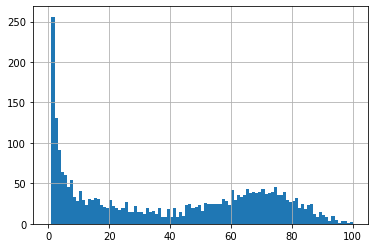

In [44]:
calls['duration'].value_counts().hist(bins=100,range=(0,100))

In [45]:
user_mean_call_duration = calls.pivot_table(index='user_id',values='duration',aggfunc='sum')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f803c0c9750>]],
      dtype=object)

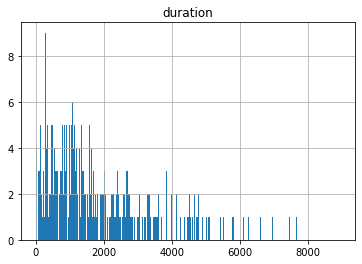

In [46]:
user_mean_call_duration.hist(bins=500)

Above we can see that most users mean call time hovers around 7 minutes.  But this data is skewed  by the extreme over abundance of 0 values.  If we remove them the histogram distribution appears:

,duration
count,110901.000000
mean,8.378196
std,5.354567
min,0.010000
25%,4.150000
50%,7.710000
75%,11.820000
max,37.600000


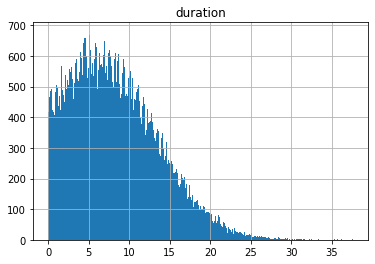

In [47]:
calls_no_zero = calls.query('duration > 0')
calls_no_zero.hist(bins=500)
calls_no_zero.describe()

In [48]:
calls_per_user= calls_no_zero.pivot_table(index = 'user_id',values = 'id',aggfunc= 'count').sort_values(by='id',ascending=False)
print(calls_per_user)


           id
user_id      
1324     1064
1077      975
1334      916
1362      897
1320      867
1382      813
1365      801
1240      794
1412      752
1196      750
1336      724
1147      709
1009      698
1328      695
1277      690
1059      686
1126      682
1185      657
1132      652
1397      630
1390      618
1263      617
1082      611
1099      607
1251      602
1488      602
1329      586
1010      581
1326      581
1261      579
1257      576
1187      575
1141      572
1232      565
1268      565
1408      560
1246      559
1160      559
1061      553
1214      552
1220      549
1400      546
1359      533
1181      527
1465      525
1440      523
1236      518
1434      517
1144      515
1291      512
1174      503
1203      498
1066      493
1385      493
1138      492
1299      489
1417      473
1368      471
1022      468
1159      465
1156      461
1153      460
1109      459
1167      454
1470      451
1106      450
1313      450
1223      448
1191      437
1305  

In [49]:
minutes_per_user = calls.pivot_table(index = 'user_id',values = 'duration', aggfunc='sum')
print(minutes_per_user.sort_values(by='duration',ascending= False))

         duration
user_id          
1324      8950.28
1077      8024.09
1334      7675.17
1362      7451.17
1320      7202.87
1382      6961.02
1365      6879.70
1240      6610.85
1412      6249.31
1196      6157.67
1328      6112.47
1059      6006.06
1336      5912.09
1147      5822.43
1277      5816.74
1126      5800.05
1009      5589.68
1132      5546.62
1185      5524.35
1397      5436.30
1263      5275.22
1390      5107.69
1082      5088.37
1099      5079.93
1326      5036.38
1187      5030.19
1251      5012.62
1261      4914.52
1488      4910.60
1141      4898.71
1160      4864.00
1329      4858.73
1257      4856.21
1232      4790.59
1010      4788.86
1268      4773.52
1408      4755.19
1400      4738.36
1246      4663.77
1061      4660.80
1291      4605.00
1359      4552.42
1181      4545.55
1440      4528.77
1214      4515.72
1220      4478.86
1465      4470.48
1144      4382.09
1203      4359.63
1236      4259.10
1299      4185.30
1434      4184.15
1174      4153.70
1385      

Above we have excluded calls of 0 duration and created a pivot table to account for the unique number of calls per user.  We can identify the properties of the 0 duration calls below, labeled as "dropped_calls".

In [50]:
dropped_calls = len(calls) - len(calls_no_zero)
print(dropped_calls)

26834


### Messages per User

In [51]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null object
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


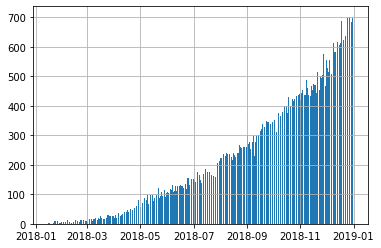

In [52]:
messages['message_date'].hist(bins=500)

In [53]:
messages.groupby('id').head(100)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [54]:
messages_per_user = messages.pivot_table(index='user_id',values='id',aggfunc='count')
print(messages_per_user.sort_values(by='id',ascending=False))

           id
user_id      
1132     1288
1328     1233
1324     1175
1470     1056
1077      804
1028      756
1076      740
1336      690
1362      672
1335      654
1101      648
1381      624
1339      608
1055      608
1144      601
1247      600
1043      599
1374      576
1384      570
1126      569
1174      552
1059      533
1320      531
1467      531
1439      528
1343      528
1254      525
1061      522
1261      503
1264      500
1159      490
1434      482
1172      475
1435      472
1346      465
1114      464
1133      455
1203      450
1145      448
1326      444
1331      440
1036      438
1405      434
1316      433
1293      432
1408      429
1454      426
1098      426
1433      420
1120      417
1110      416
1491      409
1057      400
1329      397
1079      396
1195      388
1475      378
1347      372
1011      371
1069      370
1119      366
1088      358
1193      358
1155      355
1199      351
1385      350
1167      344
1196      341
1215      340
1460  

Above are the messages per user, sorted from least to most.

In [55]:
messages['messages_per_user'] = messages_per_user
messages.head(30).sort_values(by='messages_per_user',ascending = False)
#doesn't work according to the below table.

,id,user_id,message_date,messages_per_user
0,1000_125,1000,2018-12-27,NaN
1,1000_160,1000,2018-12-31,NaN
2,1000_223,1000,2018-12-31,NaN
3,1000_251,1000,2018-12-27,NaN
4,1000_255,1000,2018-12-26,NaN
5,1000_346,1000,2018-12-29,NaN
6,1000_386,1000,2018-12-30,NaN
7,1000_413,1000,2018-12-31,NaN
8,1000_502,1000,2018-12-27,NaN
9,1000_525,1000,2018-12-28,NaN


### Internet per User

In [56]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


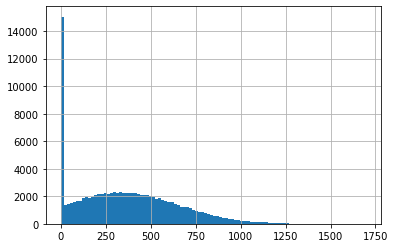

In [57]:
internet['mb_used'].hist(bins=100)

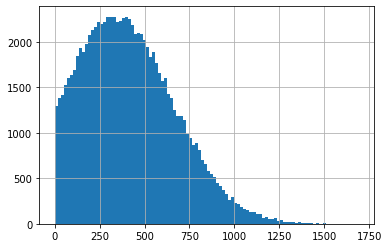

In [58]:
internet_used = internet.query('mb_used > 0')
internet_used['mb_used'].hist(bins=100)

In [59]:
internet_not_zero = internet_used.pivot_table(index='user_id',values='mb_used',aggfunc='sum')
print(internet_not_zero.sort_values(by='mb_used',ascending= False))

           mb_used
user_id           
1028     390159.35
1268     312518.64
1359     306503.85
1185     289533.36
1144     275045.28
1196     265744.06
1147     257374.65
1374     245534.40
1240     241510.24
1292     238597.18
1403     237879.26
1251     233686.21
1077     228772.19
1498     227525.13
1155     226437.93
1171     226250.32
1460     215882.22
1328     215711.85
1132     213787.95
1214     207920.48
1138     207230.10
1201     205644.03
1043     204237.44
1312     195201.75
1120     194813.98
1066     194480.20
1041     191599.12
1261     191330.87
1490     190904.51
1277     187377.17
1009     187237.74
1126     183729.34
1406     179102.16
1061     171688.77
1054     171648.65
1099     171442.81
1156     171285.53
1187     169628.37
1106     168961.82
1160     167495.68
1488     165767.74
1362     165615.77
1072     164408.85
1408     163944.64
1110     163687.80
1320     163155.97
1324     162360.60
1263     161608.57
1336     160281.02
1246     158334.32
1400     156

Above is the amount of data used by each unique customer.  Calculated by applying the 'sum' aggfunc of the pivot_table to the 'mb_used' column.

In [60]:
internet['internet_per_user'] = internet_not_zero
#seems like it has too few values to properly sync.

### Joining  Dataframes: 

Now that per user data has been calculated for calls internet and messages, it is helpful to combine data to most clearly explain the profit per user, and to examine those relationships. We'll start by adding a 'plan_type' to the calls (using the tariffs data), internet, and messages data so that we can assess more regarding the 2 plan tpyes.  

In [63]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    500 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


In [ ]:
#pd.merge('internet_not_zero', users, 'left', by='user_id')
#pd.merge('calls_not_zero', users, 'left', by='user_id')
#pd.merge('duration_per_user',users,'left',by='user_id')
#pd.merge('messages_per_user',users,'left',by='user_id')


In [ ]:
#users.head(25)

In [ ]:
#users['profit'] = (
    #if tariff = 1:
        
    #elif tariff = 2:
        
    #else:
        #return "No Plan"
    #)

In [61]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [62]:
tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


After a second look at this DF it appears to only have the values for each plan.  I suppose I am supposed to add relevant columns to the other DataFrames for calculations.

### Profit per User

Profit per user can be determined by first taking each users amount over in calls, internet and messages and then summing them up.
To start, the messages, internet, and calls tables can all be joined with the value from the tariffs table which distinguishes which plan to tailor the amount each user may exceed the plan by.
Once profit columns have been added to each of the independent tables of messages, internet, and calls; those profit columns can each be added to the Users dataframe, and summed up in an additional column for the Users table.

# Analysis by Plan

 Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.  Plot distributions according to plan 1 and plan 2.  Find the requined figures.

## Testing the Hypothesis

Alternative Hypothesis: the company earns the same amount from the Ultimate and Surf plans <br>
Null Hypothesis: the company earns different amounts from the Ultimate and Surf plans